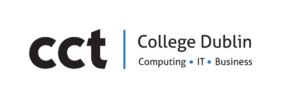

<div style="text-align: center;">
    <h2>Integrated CA</h2>
    <h2><u>Artificial Intelligence & Data Visualization and Communication</u></h1>
    <h3>Lecturers: David McQuaid and Sam Weiss</h3>
    <h3>Student Name: Danrlei da Silva Martins</h3>
    <h3>Student Number: 2020322</h3>
    <h3><a href="https://github.com/danrlei-martins-cct/AI_DV_Lv8_ICA">GitHub Repository</a></h3>
</div>

***

<h1> <u>Artificial Intelligence Tasks</u></h1>

<h3> Constraint Satisfaction Problem</h3>

Ciara is looking for employees for her new company, which develops and provides AI based logistic software for retailers. Ciara has determined that she needs:
- 2 Python Programmers
- 2 AI Engineers
- 1 Web Designer
- 1 Database Admin
- 1 Systems Engineer

Assume that if a person has two abilities, he or she can take on two roles in the company. So, Ciara narrowed down her selections to the following people:

<table>
    <tr>
        <th>Name</th>
        <th>Abilities</th>
    </tr>
    <tr>
        <td>Peter</td>
        <td>Python and AI</td>
    </tr>
    <tr>
        <td>Juan</td>
        <td>Web and AI</td>
    </tr>
    <tr>
        <td>Jim</td>
        <td>AI and Systems</td>
    </tr> 
    <tr>
        <td>Jane</td>
        <td>Python and Database</td>
    </tr>    
    <tr>
        <td>Mary</td>
        <td>Web and AI</td>
    </tr>    
    <tr>
        <td>Bruce</td>
        <td>Systems and Python</td>
    </tr>    
    <tr>
        <td>Anita</td>
        <td>Photoshop and AI</td>
    </tr>    
</table>

<h3> Scenario I </h3>

Suppose Ciara knows Python, and only has funds to hire three more people.

In [23]:
from ortools.sat.python import cp_model

# Creating a constraint programming model
model = cp_model.CpModel()

# Defining variables
names = ["Ciara", "Peter", "Juan", "Jim", "Jane", "Mary", "Bruce", "Anita"]

abilities = {
  "Ciara": ["Python"],
  "Peter": ["Python", "AI"],
  "Juan": ["Web", "AI"],
  "Jim": ["AI", "Systems"],
  "Jane": ["Python", "Database"],
  "Mary": ["Web", "AI"],
  "Bruce": ["Systems", "Python"],
  "Anita": ["Photoshop", "AI"]
}

num_python_programmers = 2
num_ai_engineers = 2
num_web_designer = 1
num_database_admin = 1
num_systems_engineers = 1
hiring_max = 4

# Decision variables: 1 if person is selected, 0 otherwise
is_selected = {name: model.NewBoolVar(f"is_selected_{name}") for name in names}

# Constraint: Ciara is selected
model.Add(is_selected["Ciara"] == 1)

# Constraint: Each role needs to be covered
model.Add(sum(is_selected[name] for name in names if "Python" in abilities[name]) == num_python_programmers)
model.Add(sum(is_selected[name] for name in names if "AI" in abilities[name]) == num_ai_engineers)
model.Add(sum(is_selected[name] for name in names if "Web" in abilities[name]) == num_web_designer)
model.Add(sum(is_selected[name] for name in names if "Database" in abilities[name]) == num_database_admin)
model.Add(sum(is_selected[name] for name in names if "Systems" in abilities[name]) == num_systems_engineers)

# Constraint: Select a maximum of 4 people
model.Add(sum(is_selected.values()) <= hiring_max)

# Solving the model
solver = cp_model.CpSolver()
status = solver.Solve(model)

# Displaying the solution or indicating if no solution is found
if status == cp_model.OPTIMAL or status == cp_model.FEASIBLE:
    solution_count = 0
    while True:
        selected_team = [name for name in names if solver.Value(is_selected[name]) == 1]
        solution_count += 1
        print(f"Solution {solution_count}:")
        print("Selected Team:", ', '.join(selected_team))
        print(f"Number of selected candidates: {len(selected_team)}\n")

        # Exclude the current solution
        model.Add(sum(is_selected[name] for name in selected_team) < len(selected_team))

        # Search for the next solution
        try:
            status = solver.Solve(model)
        except cp_model.SolverException as e:
            print(f"Error: {e}")
            break

        # Break the loop if no more solutions
        if status != cp_model.OPTIMAL and status != cp_model.FEASIBLE:
            break
else:
    print("No solution found.")

Solution 1:
Selected Team: Ciara, Jim, Jane, Mary
Number of selected candidates: 4

Solution 2:
Selected Team: Ciara, Juan, Jim, Jane
Number of selected candidates: 4



***

<h3> Scenario II </h3>

Suppose Ciara and Juan become partners, with the additional funds they can now employ four more people but must employ another AI Engineer.

In [20]:
from ortools.sat.python import cp_model

# Creating a constraint programming model
model = cp_model.CpModel()

# Defining variables
names = ["Ciara", "Peter", "Juan", "Jim", "Jane", "Mary", "Bruce", "Anita"]

abilities = {
  "Ciara": ["Python"],
  "Peter": ["Python", "AI"],
  "Juan": ["Web", "AI"],
  "Jim": ["AI", "Systems"],
  "Jane": ["Python", "Database"],
  "Mary": ["Web", "AI"],
  "Bruce": ["Systems", "Python"],
  "Anita": ["Photoshop", "AI"]
}

num_python_programmers = 2
num_ai_engineers = 3
num_web_designer = 1
num_database_admin = 1
num_systems_engineers = 1
hiring_max = 6

# Decision variables: 1 if person is selected, 0 otherwise
is_selected = {name: model.NewBoolVar(f"is_selected_{name}") for name in names}

# Constraint: Ciara and Juan are selected
model.Add(is_selected["Ciara"] == 1)
model.Add(is_selected["Juan"] == 1)

# Constraint: Each role needs to be covered
model.Add(sum(is_selected[name] for name in names if "Python" in abilities[name]) >= num_python_programmers)
model.Add(sum(is_selected[name] for name in names if "AI" in abilities[name]) >= num_ai_engineers)
model.Add(sum(is_selected[name] for name in names if "Web" in abilities[name]) >= num_web_designer)
model.Add(sum(is_selected[name] for name in names if "Database" in abilities[name]) >= num_database_admin)
model.Add(sum(is_selected[name] for name in names if "Systems" in abilities[name]) >= num_systems_engineers)

# Constraint: Select a maximum of 6 people
model.Add(sum(is_selected.values()) <= hiring_max)

# Solving the model
solver = cp_model.CpSolver()
status = solver.Solve(model)

# Displaying the solution or indicating if no solution is found
if status == cp_model.OPTIMAL or status == cp_model.FEASIBLE:
    solution_count = 0
    while True:
        selected_team = [name for name in names if solver.Value(is_selected[name]) == 1]
        solution_count += 1
        print(f"Solution {solution_count}:")
        print("Selected Team:", ', '.join(selected_team))
        print(f"Number of selected candidates: {len(selected_team)}\n")

        # Exclude the current solution
        model.Add(sum(is_selected[name] for name in selected_team) < len(selected_team))

        # Search for the next solution
        try:
            status = solver.Solve(model)
        except cp_model.SolverException as e:
            print(f"Error: {e}")
            break

        # Break the loop if no more solutions
        if status != cp_model.OPTIMAL and status != cp_model.FEASIBLE:
            break
else:
    print("No solution found.")

Solution 1:
Selected Team: Ciara, Peter, Juan, Jim, Jane
Number of selected candidates: 5

Solution 2:
Selected Team: Ciara, Juan, Jim, Jane, Mary
Number of selected candidates: 5

Solution 3:
Selected Team: Ciara, Juan, Jane, Mary, Bruce, Anita
Number of selected candidates: 6

Solution 4:
Selected Team: Ciara, Juan, Jim, Jane, Anita
Number of selected candidates: 5

Solution 5:
Selected Team: Ciara, Peter, Juan, Jane, Bruce, Anita
Number of selected candidates: 6

Solution 6:
Selected Team: Ciara, Peter, Juan, Jane, Mary, Bruce
Number of selected candidates: 6



***

<h2> Solving CSP with different algorithm</h2>

These problems be solved using several other algorithm’s we have studied in the module. Choose one of these algorithms and discuss your answer in detail including a proof of your hypothesis in code.

<h3> Scenario I </h3>

In [21]:
# Define variables
names = ["Ciara", "Peter", "Juan", "Jim", "Jane", "Mary", "Bruce", "Anita"]

abilities = {
    "Ciara": ["Python"],
    "Peter": ["Python", "AI"],
    "Juan": ["Web", "AI"],
    "Jim": ["AI", "Systems"],
    "Jane": ["Python", "Database"],
    "Mary": ["Web", "AI"],
    "Bruce": ["Systems", "Python"],
    "Anita": ["Photoshop", "AI"]
}

# Define role requirements
roles = {
    "Python": 2,
    "AI": 2,
    "Web": 1,
    "Database": 1,
    "Systems": 1
}

class TeamBuilder:
    
    def __init__(self, names, abilities, roles, hiring_max):
        self.names = names
        self.abilities = abilities
        self.roles = roles
        self.hiring_max = hiring_max
        self.solutions = []

    # Checks if a person can fill any of the remaining roles
    def satisfies_constraints(self, person, current_roles, current_team):
        person_abilities = self.abilities[person]
        for ability in person_abilities:
            if ability in current_roles and current_roles[ability] > 0:
                if "Ciara" in current_team or person == "Ciara":
                    return True
        return False

    # Recursively builds teams and checks if they satisfy the constraints
    def hire_team(self, current_roles, current_team):
        if len(current_team) == self.hiring_max:
            if all(value == 0 for value in current_roles.values()):
                sorted_team = sorted(list(current_team))
                if sorted_team not in self.solutions:
                    self.solutions.append(sorted_team)
            return
        for person in self.names:
            if person not in current_team and self.satisfies_constraints(person, current_roles, current_team):
                new_roles = current_roles.copy()
                for ability in self.abilities[person]:
                    if ability in new_roles and new_roles[ability] > 0:
                        new_roles[ability] -= 1
                        # The person can fill a remaining role
                        # Recursively call the function
                        self.hire_team(new_roles, current_team | {person})
    
    def print_solutions(self):
        if self.solutions:
            print("Scenario I Results:")
            for idx, team in enumerate(self.solutions, start=1):
                print(f"Solution {idx}: {', '.join(team)}")
        else:
            print("No solution found.")
                        
# Start team search
team_builder = TeamBuilder(names, abilities, roles, 4)
team_builder.hire_team(roles, set())
team_builder.print_solutions()

Scenario I Results:
Solution 1: Ciara, Jane, Jim, Juan
Solution 2: Ciara, Jane, Jim, Mary


<h2> Scenario II </h2>

In [22]:
# Define variables
names = ["Ciara", "Peter", "Juan", "Jim", "Jane", "Mary", "Bruce", "Anita"]

abilities = {
    "Ciara": ["Python"],
    "Peter": ["Python", "AI"],
    "Juan": ["Web", "AI"],
    "Jim": ["AI", "Systems"],
    "Jane": ["Python", "Database"],
    "Mary": ["Web", "AI"],
    "Bruce": ["Systems", "Python"],
    "Anita": ["Photoshop", "AI"]
}

# Define role requirements
roles = {
    "Python": 2,
    "AI": 3,
    "Web": 1,
    "Database": 1,
    "Systems": 1
}

class TeamBuilder:
    
    def __init__(self, names, abilities, roles, hiring_max):
        self.names = names
        self.abilities = abilities
        self.roles = roles
        self.hiring_max = hiring_max
        self.solutions = []

    # Checks if a person can fill any of the remaining roles
    def satisfies_constraints(self, person, current_roles, current_team):
        person_abilities = self.abilities[person]
        for ability in person_abilities:
            if ability in current_roles and current_roles[ability] > 0:
                if "Ciara" in current_team or person == "Ciara" and "Juan" in current_team or person == "Juan":
                    return True
        return False

    # Recursively builds teams and checks if they satisfy the constraints
    def hire_team(self, current_roles, current_team):
        if len(current_team) >= self.hiring_max:
            if all(value == 0 for value in current_roles.values()):
                sorted_team = sorted(list(current_team))
                if sorted_team not in self.solutions:
                    self.solutions.append(sorted_team)
            return
        for person in self.names:
            if person not in current_team and self.satisfies_constraints(person, current_roles, current_team):
                new_roles = current_roles.copy()
                for ability in self.abilities[person]:
                    if ability in new_roles and new_roles[ability] > 0:
                        new_roles[ability] -= 1
                        # The person can fill a remaining role
                        # Recursively call the function
                        self.hire_team(new_roles, current_team | {person})
                        
    def print_solutions(self):
        if self.solutions:
            print("Scenario II Results:")
            for idx, team in enumerate(self.solutions, start=1):
                print(f"Solution {idx}: {', '.join(team)}")
        else:
            print("No solution found.")
                        
# Start team search
team_builder = TeamBuilder(names, abilities, roles, 6)
team_builder.hire_team(roles, set())
team_builder.print_solutions()

Scenario II Results:
Solution 1: Ciara, Jane, Jim, Juan, Mary, Peter
Solution 2: Anita, Ciara, Jane, Jim, Juan, Peter
Solution 3: Anita, Ciara, Jane, Jim, Juan, Mary
Solution 4: Bruce, Ciara, Jane, Jim, Juan, Peter
Solution 5: Bruce, Ciara, Jane, Juan, Mary, Peter
Solution 6: Anita, Bruce, Ciara, Jane, Juan, Peter
Solution 7: Bruce, Ciara, Jane, Jim, Juan, Mary
Solution 8: Anita, Bruce, Ciara, Jane, Jim, Juan
Solution 9: Anita, Bruce, Ciara, Jane, Juan, Mary
